# 2022-03-28 • The invariant measure: total stimulation

## Setup

In [1]:
#

In [2]:
using Revise

In [3]:
using MyToolbox

In [4]:
using VoltageToMap

[ Info: Precompiling VoltageToMap [b3b8fdc5-3c26-4000-a0c8-f17415fdf48e]


## Params & sim

Short warm-up run. Get compilation out of the way.

In [5]:
p0 = ExperimentParams(
    sim = SimParams(
        input = previous_N_30_input,
        duration = 1 * minutes
    )
);

In [14]:
@time sim(p0.sim);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  1.083182 seconds (1.21 M allocations: 183.632 MiB, 83.37% gc time)


In [21]:
p = ExperimentParams(
    sim = SimParams(
        input = realistic_N_6600_input,
        duration = 1 * minutes,
        synapses = SynapseParams(
            Δg_multiplier = 0.066,
        ),
        imaging = VoltageImagingParams(
            spike_height = cortical_RS.v_peak - cortical_RS.v_rest,
            spike_SNR = Inf,
        )
    )
);
dumps(p)

ExperimentParams
  rngseed: 22022022
  sim: SimParams
    duration: 60.0
    Δt: 0.0001
    num_timesteps: 600000
    rngseed: 0
    input: PoissonInputParams
      N_unconn: 100
      N_exc: 5200
      N_inh: 1300
      N_conn: 6500
      N: 6600
      spike_rates: LogNormal
        μ: 1.08629
        σ: 0.774597
    synapses: SynapseParams
      Δg_exc: 4.0e-10
      Δg_inh: 1.6e-9
      Δg_multiplier: 0.066
      E_exc: 0.0
      E_inh: -0.065
      g_t0: 0.0
      τ: 0.007
    izh_neuron: IzhikevichParams
      C: 1.0e-10
      k: 7.0e-7
      v_rest: -0.06
      v_thr: -0.04
      a: 30.0
      b: -2.0e-9
      v_peak: 0.035
      v_reset: -0.05
      Δu: 1.0e-10
      v_t0: -0.06
      u_t0: 0.0
    imaging: VoltageImagingParams
      spike_SNR: Inf
      spike_SNR_dB: Inf
      spike_height: 0.095
      σ_noise: 0.0
  conntest: ConnTestParams
    STA_window_length: 0.1
    num_shuffles: 100
    rngseed: 22022022
  evaluation: EvaluationParams
    num_tested_neurons_per_group: 40

In [22]:
t, v, vimsig, input_spikes = @time sim(p.sim);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15
 16.387769 seconds (1.96 M allocations: 317.323 MiB, 7.45% gc time)


In [23]:
num_spikes = length.(input_spikes)

ComponentVector{Int64}(conn = (exc = [120, 89, 137, 92, 55, 103, 87, 53, 102, 86  …  103, 101, 119, 109, 28, 60, 114, 36, 115, 88], inh = [50, 95, 82, 15, 94, 64, 120, 105, 15, 66  …  132, 63, 93, 51, 107, 124, 103, 103, 100, 134]), unconn = [94, 91, 71, 104, 143, 91, 63, 146, 76, 57  …  145, 88, 95, 37, 126, 132, 143, 74, 52, 38])

## Plot

In [19]:
import PyPlot

In [24]:
using VoltageToMap.Plot

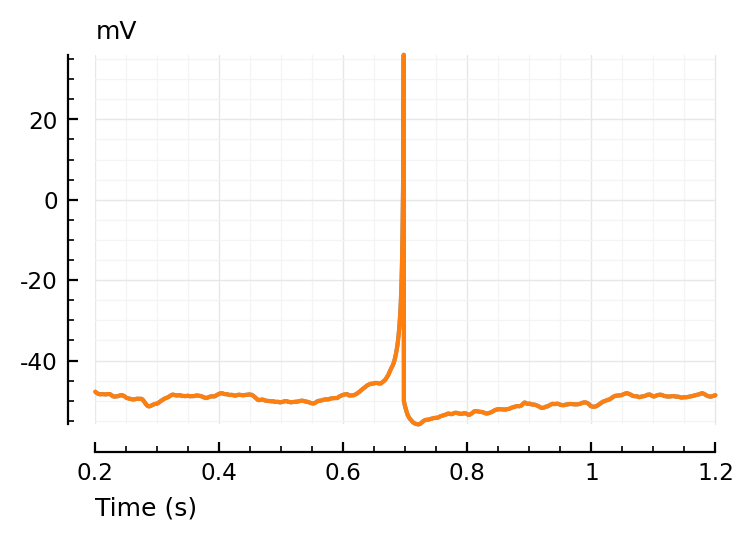

In [25]:
tzoom = [200, 1200]ms
ax = plotsig(t, vimsig / mV, tzoom; xlabel="Time (s)", hylabel="mV", alpha=0.7);
plotsig(t, v / mV, tzoom; ax);

(Perfect overlap of Vm and VI sig: ∞ SNR)

## Total stimulation

In [ ]:
# 

In [ ]:
init_state = # init_sim(p).state.fixed_at_init

@. total_stim = # init_state.Δg * num_spikes

## p-values

In [ ]:
for train in …:
    p_value = test_connection(…)

## Plot

In [ ]:
plot(total_stim, p_value)

..but separated by exc, inh, unconn.

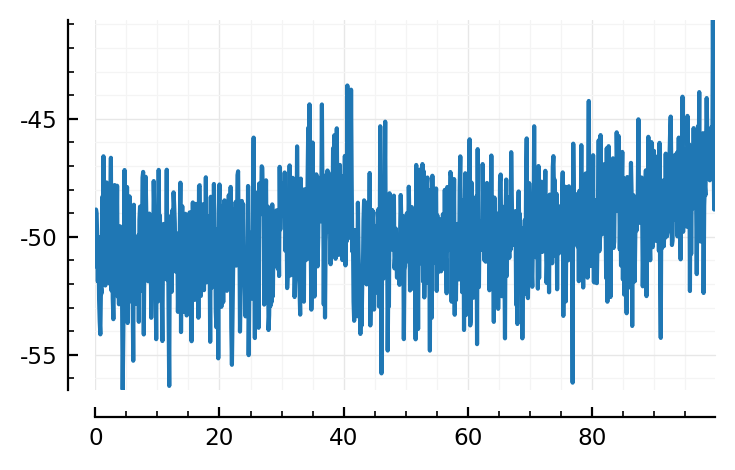

In [15]:
example_presynspikes = input_spikes.conn.exc[44]
plotSTA(vimsig, example_presynspikes, p);

In [19]:
p_value = test_connection(vimsig, example_presynspikes, p)

0.61

In [34]:
N_eval_trains = p.evaluation.num_tested_neurons_per_group

40